# Homework 4 - Question 2

## Importing and cleaning

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import random
from numpy import array

# Machine Learning
from scipy.cluster.vq import vq, kmeans, whiten

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('CrowdstormingDataJuly1st.csv')
df_referee = df[['playerShort','refNum','refCountry','Alpha_3','meanIAT','nIAT','seIAT','meanExp','nExp','seExp']]
df_referee.head()

,playerShort,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [3]:
df_referee[df_referee.refCountry==8].head()

,playerShort,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
224,levent-aycicek,9,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225
225,nico-brandenburger,9,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225
226,niklas-bolten,9,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225
373,kingsley-onuegbu,21,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225
374,philipp-wollscheid,21,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225


In [4]:
df_referee[df_referee.Alpha_3=='FRA'].head()

,playerShort,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
45,abdou-dampha,7,7,FRA,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586
46,abdoul-camara,7,7,FRA,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586
47,abdoulaye-diallo_2,7,7,FRA,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586
48,ahmed-kantari,7,7,FRA,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586
49,aissa-mandi,7,7,FRA,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586


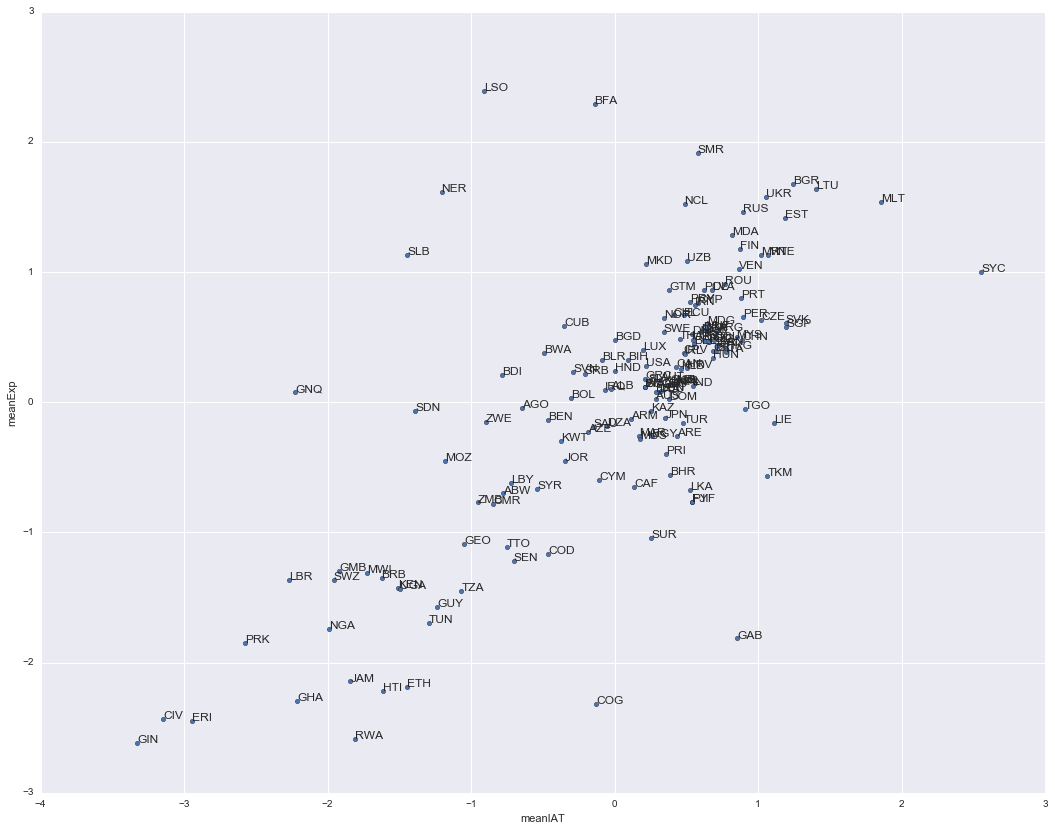

In [5]:
df_countries = df_referee.groupby('Alpha_3').first()[['meanIAT','meanExp']]

meanMeanIAT = df_countries['meanIAT'].mean()
stdMeanIAT = df_countries['meanIAT'].std()
meanMeanExp = df_countries['meanExp'].mean()
stdMeanExp = df_countries['meanExp'].std()

df_countries['meanIAT'] = (df_countries['meanIAT'] - meanMeanIAT) / stdMeanIAT
df_countries['meanExp'] = (df_countries['meanExp'] - meanMeanExp) / stdMeanExp

fig, ax = plt.subplots(figsize=(18, 14), dpi=400)

df_countries.plot(kind='scatter', x='meanIAT', y='meanExp', ax=ax)

for k, v in df_countries.iterrows():
    ax.annotate(k, v)

fig.canvas.draw()

## Aggregating players data and computing features

In [6]:
def weighted(df):
    #df['meanIAT'] = (df['meanIAT'] - meanMeanIAT) / stdMeanIAT
    #df['meanExp'] = (df['meanExp'] - meanMeanExp) / stdMeanExp
    for column in ['victories','defeats','ties','goals','yellowCards','yellowReds','redCards']:
        df[column+'IAT'] = df[column] * df['meanIAT']
        df[column+'Exp'] = df[column] * df['meanExp']
    return df

df_players_weighted = weighted(
    df[
        ['playerShort','games','victories','defeats','ties','goals','yellowCards','yellowReds','redCards','meanIAT','meanExp']
    ].copy()
)

df_players_weighted.head()

,playerShort,games,victories,defeats,ties,goals,yellowCards,yellowReds,redCards,meanIAT,...,tiesIAT,tiesExp,goalsIAT,goalsExp,yellowCardsIAT,yellowCardsExp,yellowRedsIAT,yellowRedsExp,redCardsIAT,redCardsExp
0,lucas-wilchez,1,0,1,0,0,0,0,0,0.326391,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,john-utaka,1,0,1,0,0,1,0,0,0.203375,...,0.000000,-0.000000,0.0,-0.0,0.203375,-0.204082,0.0,-0.0,0.0,-0.0
2,abdon-prats,1,0,0,1,0,1,0,0,0.369894,...,0.369894,0.588297,0.0,0.0,0.369894,0.588297,0.0,0.0,0.0,0.0
3,pablo-mari,1,1,0,0,0,0,0,0,0.369894,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,ruben-pena,1,1,0,0,0,0,0,0,0.369894,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [7]:
df_players = df_players_weighted.groupby('playerShort').sum()
df_players.drop(['meanIAT','meanExp'],axis=1,inplace=True)
df_players = df_players.div(df_players.games, axis='index')
df_players.drop(['games'],axis=1,inplace=True)
df_players.head()

,victories,defeats,ties,goals,yellowCards,yellowReds,redCards,victoriesIAT,victoriesExp,defeatsIAT,...,tiesIAT,tiesExp,goalsIAT,goalsExp,yellowCardsIAT,yellowCardsExp,yellowRedsIAT,yellowRedsExp,redCardsIAT,redCardsExp
playerShort,,,,,,,,,,,,,,,,,,,,,
aaron-hughes,0.377676,0.348624,0.273700,0.013761,0.029052,0.000000,0.000000,0.125911,0.154877,0.116244,...,0.091040,0.108587,0.004606,0.005612,0.009817,0.012586,0.000000,0.000000,0.000000,0.000000
aaron-hunt,0.419643,0.363095,0.217262,0.184524,0.125000,0.000000,0.002976,0.143563,0.164324,0.123388,...,0.074486,0.083222,0.062454,0.066173,0.042781,0.048419,0.000000,0.000000,0.001002,0.001000
aaron-lennon,0.485437,0.279126,0.235437,0.075243,0.026699,0.000000,0.000000,0.162948,0.201414,0.091605,...,0.077836,0.095341,0.024752,0.027332,0.008864,0.010738,0.000000,0.000000,0.000000,0.000000
aaron-ramsey,0.576923,0.261538,0.161538,0.150000,0.119231,0.000000,0.003846,0.193189,0.243003,0.089673,...,0.053776,0.065965,0.051691,0.073244,0.040240,0.051198,0.000000,0.000000,0.001287,0.001293
abdelhamid-el-kaoutari,0.330645,0.346774,0.322581,0.008065,0.064516,0.032258,0.016129,0.109080,0.108069,0.116718,...,0.106084,0.099404,0.002699,0.002710,0.021593,0.021684,0.010943,0.011726,0.005398,0.005421


## Hierachical clustering of soccer players

In [8]:
features = array(df_players.values.tolist())

In [9]:
whitened = whiten(features[:100])
book = array((whitened[0],whitened[1]))
(centroids,distortion) = kmeans(whitened,book)
centroids

array([[ 2.59752004,  3.97795912,  3.74391014,  0.34692413,  0.73525023,
         0.07914597,  0.29599968,  2.47779973,  1.55854395,  3.70344481,
         2.45512344,  3.64698787,  2.81081197,  0.32839622,  0.25353536,
         0.70103006,  0.60011361,  0.07696979,  0.0679925 ,  0.28580419,
         0.23057866],
       [ 3.63271962,  3.2074688 ,  3.17246296,  1.34500741,  1.77406491,
         0.82554772,  0.82515238,  3.56885522,  2.61331353,  3.08275964,
         2.15033561,  3.12681121,  2.62250291,  1.34108535,  1.27401184,
         1.727352  ,  1.53183337,  0.83256142,  0.81488662,  0.8392713 ,
         0.86818794]])

In [10]:
(repartition, distances) = vq(obs=whitened, code_book=centroids)
repartition[:10]

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int32)

TODO measure of the cluster silhouette and black/white division 